In [47]:
library(caret)

In [48]:
#install.packages('caTools')

In [49]:
data <- read.csv("/home/hasan/Data Set/medical cost prediction/insurance.csv")
head(data)

age,sex,bmi,children,smoker,region,charges
19,female,27.900,0,yes,southwest,16884.924
18,male,33.770,1,no,southeast,1725.552
28,male,33.000,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.471
32,male,28.880,0,no,northwest,3866.855
31,female,25.740,0,no,southeast,3756.622


In [50]:
dim(data)

[1] 1338    7

In [51]:
sum(is.na(data))

[1] 0

In [52]:
summary(data)

      age            sex           bmi           children     smoker    
 Min.   :18.00   female:662   Min.   :15.96   Min.   :0.000   no :1064  
 1st Qu.:27.00   male  :676   1st Qu.:26.30   1st Qu.:0.000   yes: 274  
 Median :39.00                Median :30.40   Median :1.000             
 Mean   :39.21                Mean   :30.66   Mean   :1.095             
 3rd Qu.:51.00                3rd Qu.:34.69   3rd Qu.:2.000             
 Max.   :64.00                Max.   :53.13   Max.   :5.000             
       region       charges     
 northeast:324   Min.   : 1122  
 northwest:325   1st Qu.: 4740  
 southeast:364   Median : 9382  
 southwest:325   Mean   :13270  
                 3rd Qu.:16640  
                 Max.   :63770  

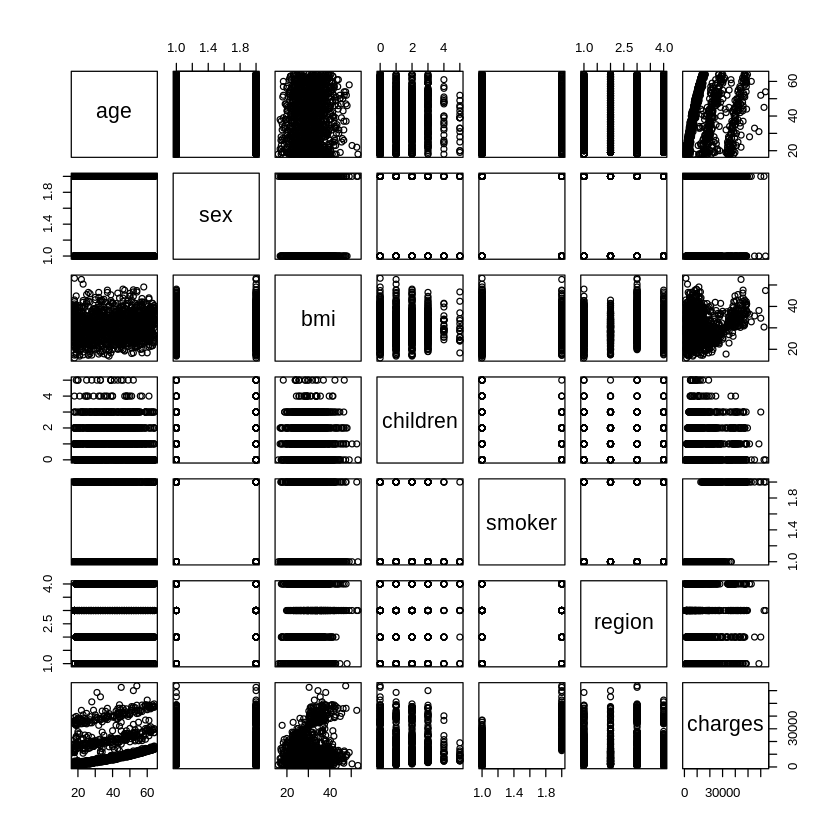

In [53]:
plot(data)

# Dividing dataset into train and test

In [54]:
train_index <- createDataPartition(data$charges, p=0.8, list=FALSE)
train_set <- data[train_index,]
test_set <- data[-train_index,]  

In [55]:
print("Train dataset dimension is :", end='')
dim(train_set)
print("Test dataset dimension is :", end='') 
dim(test_set)


[1] "Train dataset dimension is :"


[1] 1072    7

[1] "Test dataset dimension is :"


[1] 266   7

In [56]:
# Build Training model
model <- train(charges ~ ., 
               data = train_set,
               method = "lm",
               na.action = na.omit,
               preProcess=c("scale","center"),
               trControl= trainControl(method="none")
)

In [57]:
summary(model)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-11197.1  -2769.8   -913.3   1480.6  29741.4 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     13239.740    182.658  72.484  < 2e-16 ***
age              3578.723    184.331  19.415  < 2e-16 ***
sexmale            -1.749    184.124  -0.010  0.99242    
bmi              2126.024    192.787  11.028  < 2e-16 ***
children          540.763    183.199   2.952  0.00323 ** 
smokeryes        9661.308    184.280  52.427  < 2e-16 ***
regionnorthwest  -290.378    223.292  -1.300  0.19373    
regionsoutheast  -310.103    234.439  -1.323  0.18621    
regionsouthwest  -415.478    224.695  -1.849  0.06472 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5980 on 1063 degrees of freedom
Multiple R-squared:  0.7598,	Adjusted R-squared:  0.758 
F-statistic: 420.4 on 8 and 1063 DF,  p-value: < 2.2e-16


In [58]:
model_train_pred <- predict(model, train_set)
model_test_pred <- predict(model, test_set)


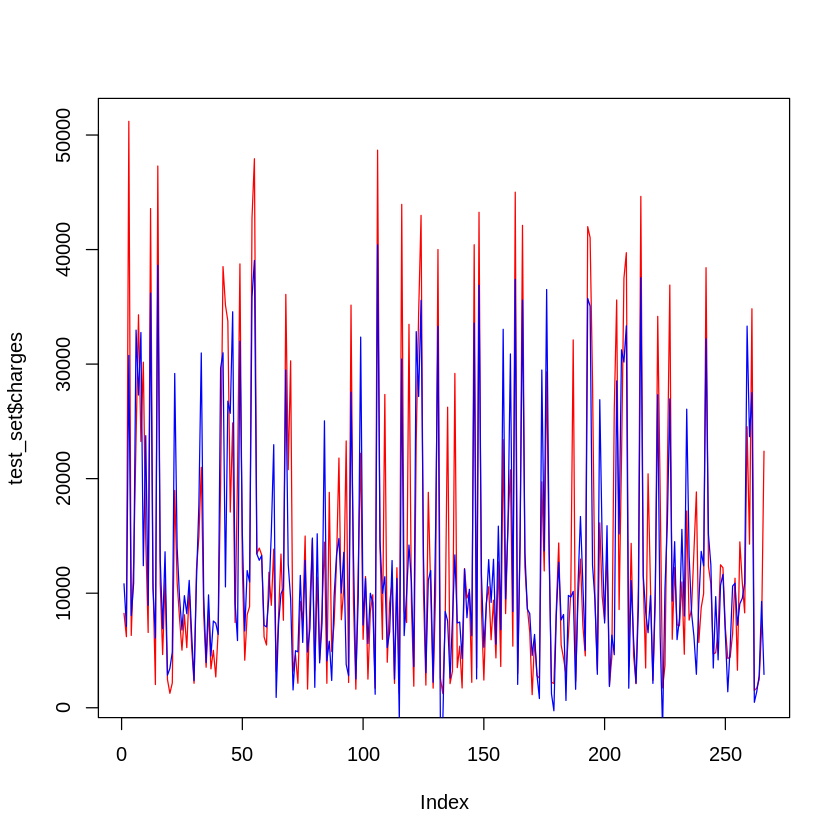

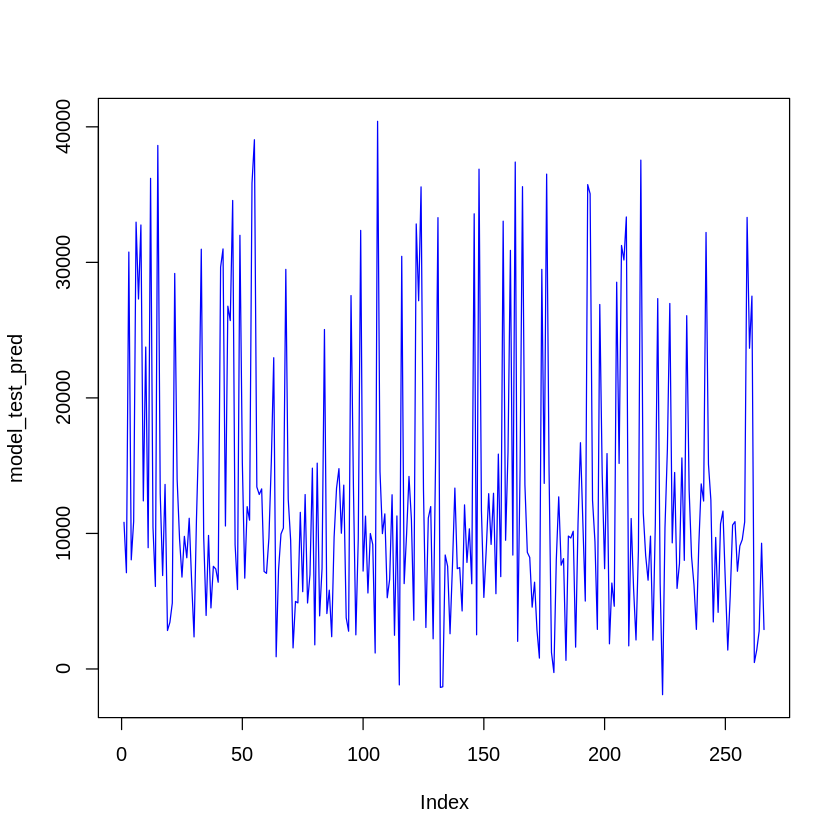

In [59]:
# Comparing predicted vs actual values
plot(test_set$charges, type='l', lty=1.8, col='red')
lines(model_test_pred, type='l', col='blue')
plot(model_test_pred, type='l', lty=1.8, col='blue')

In [60]:
# Finding accuracy
rmse <- sqrt(mean(model_test_pred - data$charges)^2)
rmse

Warning message in model_test_pred - data$charges:
“longer object length is not a multiple of shorter object length”

[1] 466.1905

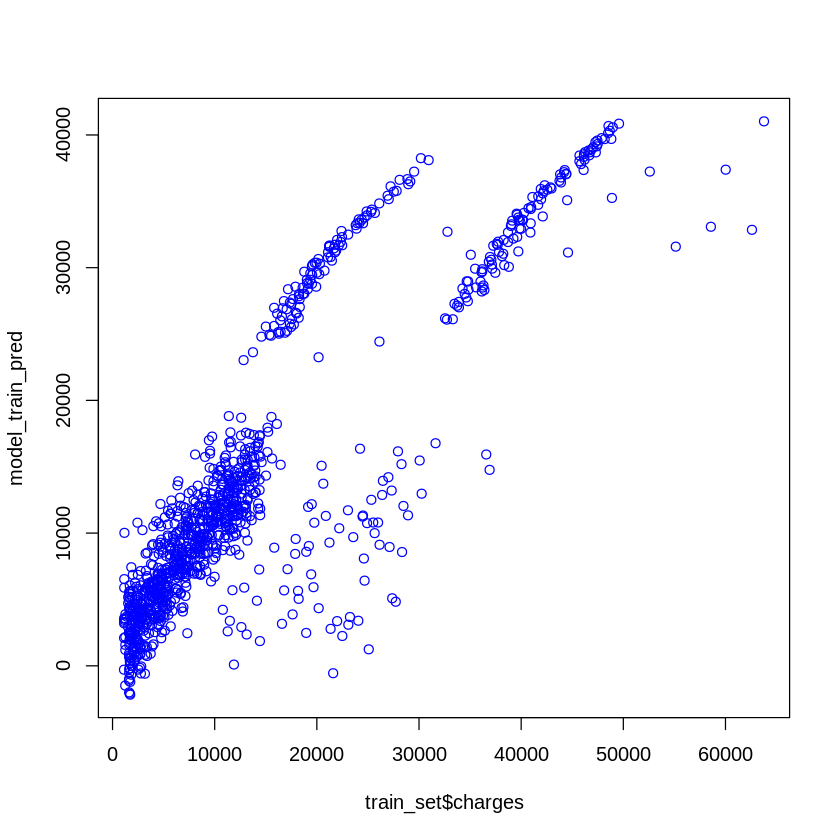

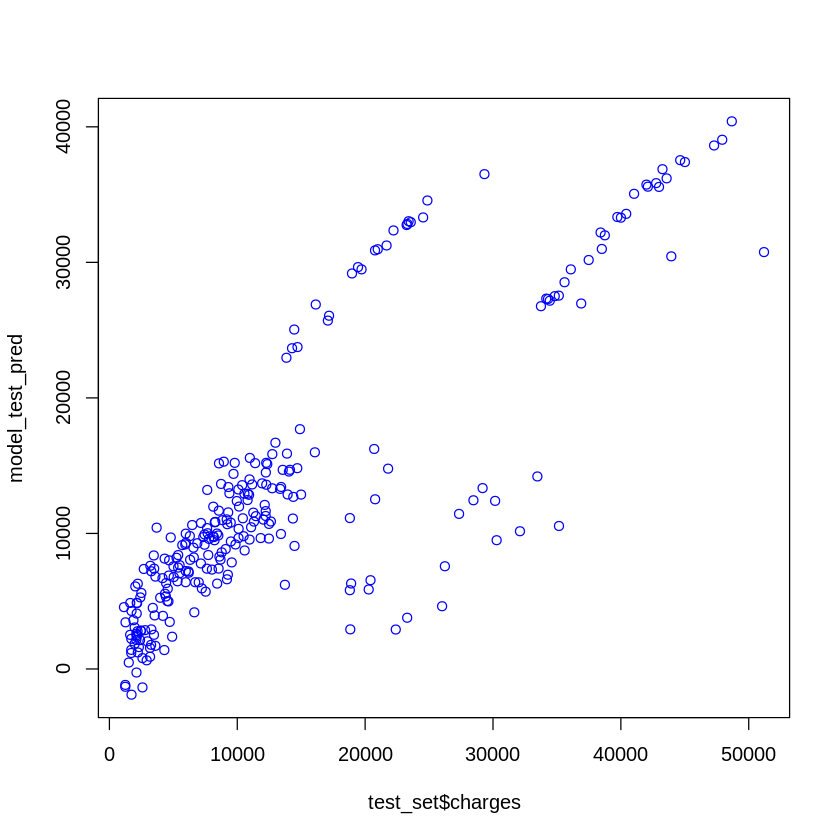

In [61]:
plot(train_set$charges, model_train_pred, col='blue')
plot(test_set$charges, model_test_pred, col='blue')